In [1]:
import sys
import os

from nlp_datasets import YahooDataset
from nlp_datasets import BaseDataset
from nlp_datasets import WordSim353Dataset
from nlp_modeltrainers import BaseTrainerModule
from nlp_metrics import Metrics

import torch
import numpy as np
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.nn import Module, Linear, Embedding
from torch.utils.data import DataLoader

from scipy.stats import spearmanr
import fastwer

from nltk import word_tokenize

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from pytorch_lightning import LightningModule

dev = 'cpu'
if torch.cuda.is_available():
    dev = "cuda:0"

device = torch.device(dev)

In [2]:
from utils.SubwordHash import subwordhash
from utils.SubwordEmbedding import subwordembedding
from utils.config import *

In [3]:
word_embedding = subwordembedding(num_embeddings = num_emb, embedding_dim = emb_dim, device = device, padding_idx = 0)
word_embedding.load_state_dict(torch.load(emb_path))
print(f'Loaded model: trained_model_{emb_dim}d_{epoch}')
print(word_embedding.num_embeddings)

Loaded model: trained_model_50d_100e
2000001


In [4]:
latesum_word_embedding = subwordembedding(num_embeddings = num_emb, embedding_dim = emb_dim, device = device, padding_idx = 0)
latesum_word_embedding.load_state_dict(torch.load(emb_path+'_latesum'))
print(f'Loaded model: trained_model_{emb_dim}d_{epoch}_latesum')
print(latesum_word_embedding.num_embeddings)

Loaded model: trained_model_50d_100e_latesum
2000001


In [5]:
dataset = YahooDataset(max_samples=max_samples, local_dir="../datasets/small_yahoo_dataset")
subword_hashes = subwordhash(dataset.train)

max_sw_hash_len = subword_hashes.max_hash
max_sample_len = subword_hashes.max_sample
print(max_sw_hash_len)
print(max_sample_len)

100%|█████████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:07<00:00, 1168.55it/s]


377
995


In [6]:
def semantic_eval(word_corpus, word_embedding, subword_hashes):
    spearman_corr = Metrics("Spearman")
    cosine_sim = Metrics("Cosine_Similarity")
    
    target_sim = np.array([])
    model_sim = np.array([])
    
    if isinstance(word_corpus[0], dict):
        keys = list(word_corpus[0])
    else:
        keys = range(3)
        
    for w in tqdm(word_corpus):
        sw1 = subword_hashes(w[keys[0]])
        sw2 = subword_hashes(w[keys[1]])
        subword_embed = word_embedding.subword_embedding(torch.tensor([sw1,sw2], dtype = torch.long))
        word_embed = subword_embed.sum(dim = len(subword_embed.shape) -2).unsqueeze(1).detach().numpy()
        cos_sim = cosine_sim(word_embed[0], word_embed[1])["Cosine_Similarity"]
        model_sim = np.append(model_sim, cos_sim)
        target_sim = np.append(target_sim, w[keys[2]])
    model_sim = np.expand_dims(model_sim, axis = 0)
    target_sim = np.expand_dims(target_sim, axis = 0)
    
    spearman_coef = spearman_corr(model_sim, target_sim)["Spearman"]
#     spearman_coef.append(correlation)
#         target_sim.append(w[keys[2]])
#     print('model_sim: ', model_sim)
#     print('target_sim: ', target_sim)
    print('spearman_coef: ', spearman_coef)
    plt.figure(figsize=[20,5])
#     plt.plot(spearman_coef)
    plt.plot(model_sim[0])
    plt.plot(target_sim[0])
    plt.grid()
    plt.show()
    

In [7]:
WS353ds = WordSim353Dataset(max_samples = max_samples, local_dir = "../datasets/WordSim353Dataset")
word_corpus = WS353ds.test

100%|██████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 327.69it/s]


spearman_coef:  0.044817927170868355


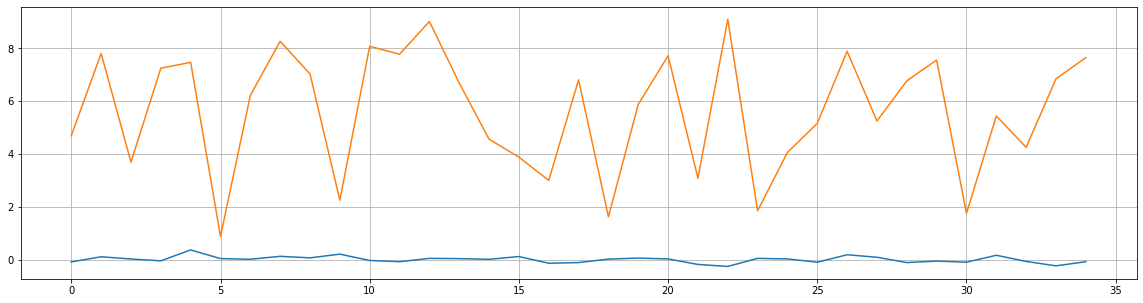

100%|█████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 1032.21it/s]

spearman_coef:  0.030252100840336138


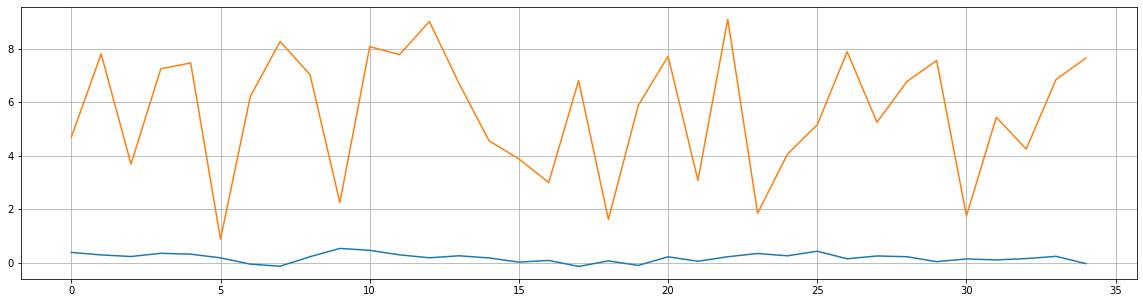

In [8]:
semantic_eval(word_corpus, word_embedding, subword_hashes)
semantic_eval(word_corpus, latesum_word_embedding, subword_hashes)

##### a = Metrics('')

In [9]:
misspellings_corpus[0]

NameError: name 'misspellings_corpus' is not defined

In [ ]:
a = np.array([])
a = np.append(a,10)
a = np.append(a,20)
a